In [1]:
# conventional way to import pandas
import pandas as pd

In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

In [5]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

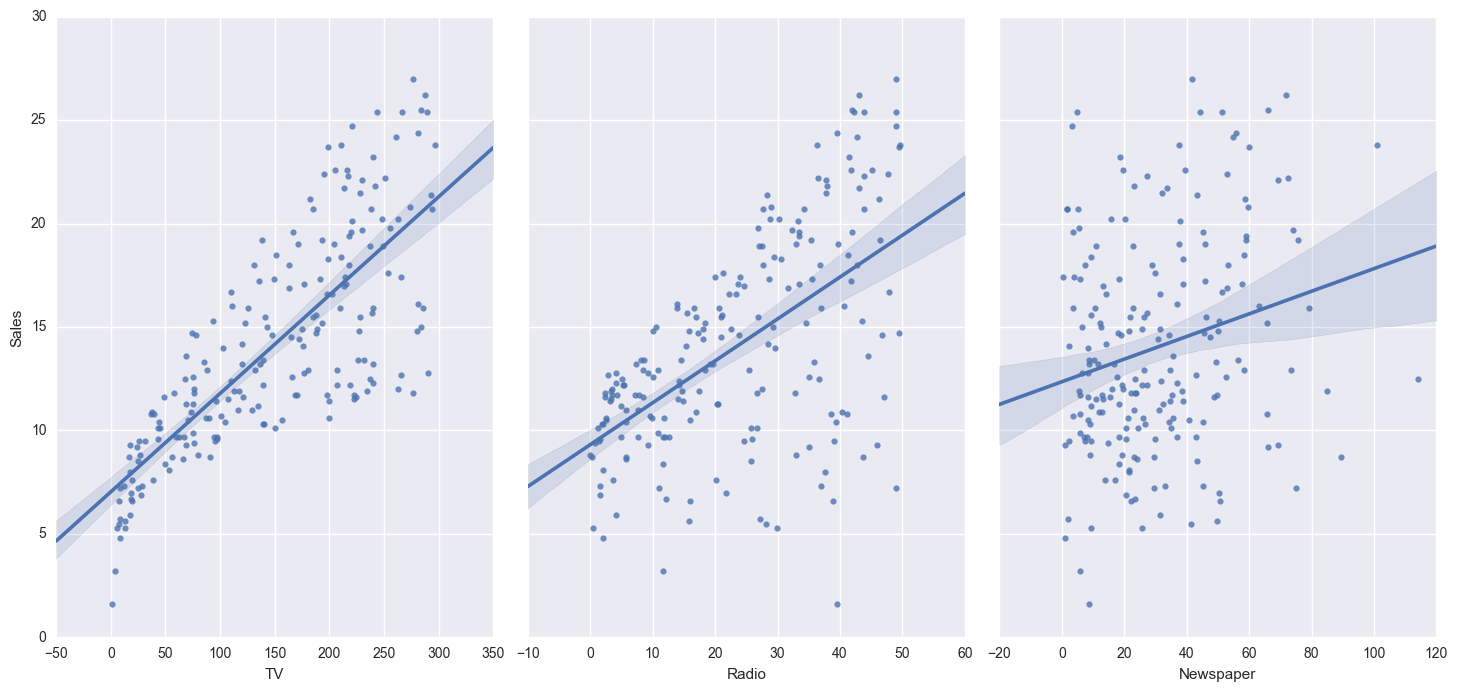

In [6]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg');

In [7]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
# check the type and shape of X
print type(X.values)
print X.values.shape

<type 'numpy.ndarray'>
(200L, 3L)


In [9]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# print the intercept and coefficients
print linreg.intercept_
print linreg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [13]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804065)]

In [15]:
X_test.loc[59]

TV           210.8
Radio         49.6
Newspaper     37.7
Name: 59, dtype: float64

In [16]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred

array([ 21.70910292,  16.41055243,   7.60955058,  17.80769552,
        18.6146359 ,  23.83573998,  16.32488681,  13.43225536,
         9.17173403,  17.333853  ,  14.44479482,   9.83511973,
        17.18797614,  16.73086831,  15.05529391,  15.61434433,
        12.42541574,  17.17716376,  11.08827566,  18.00537501,
         9.28438889,  12.98458458,   8.79950614,  10.42382499,
        11.3846456 ,  14.98082512,   9.78853268,  19.39643187,
        18.18099936,  17.12807566,  21.54670213,  14.69809481,
        16.24641438,  12.32114579,  19.92422501,  15.32498602,
        13.88726522,  10.03162255,  20.93105915,   7.44936831,
         3.64695761,   7.22020178,   5.9962782 ,  18.43381853,
         8.39408045,  14.08371047,  15.02195699,  20.35836418,
        20.57036347,  19.60636679])

In [17]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [18]:
# calculate MAE by hand
print (10 + 0 + 20 + 10)/4.

# calculate MAE using scikit-learn
from sklearn import metrics
print metrics.mean_absolute_error(true, pred)

10.0
10.0


In [19]:
# calculate MSE by hand
print (10**2 + 0**2 + 20**2 + 10**2)/4.

# calculate MSE using scikit-learn
print metrics.mean_squared_error(true, pred)

150.0
150.0


In [20]:
# calculate RMSE by hand
import numpy as np
print np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate RMSE using scikit-learn
print np.sqrt(metrics.mean_squared_error(true, pred))

12.2474487139
12.2474487139


In [21]:
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.40465142303


### KNN for regression

In [22]:
# [u'TV', u'Radio', u'Newspaper', u'Sales']

X = data[['TV', 'Radio']]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

## KNN
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=6)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)
print "RMSE KNN Regressor: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_knr))

## Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
print "RMSE Linear Regression: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))

RMSE KNN Regressor:  0.921152659564
RMSE Linear Regression:  1.62050234683


In [23]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.38790346994


In [24]:
from sklearn.cross_validation import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print scores

[-3.38264572 -3.28736055 -2.09185507 -2.81784389 -1.27311083 -1.74391853
 -8.0006111  -2.07650936 -3.03635301 -2.4289835 ]


In [27]:
mse_scores = -scores
print "Mean Squared Errors:", mse_scores
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print "RMSE SCORE:" ,rmse_scores
# calculate the average RMSE
print "RMSE Mean Score:", rmse_scores.mean()

Mean Squared Errors: [ 3.38264572  3.28736055  2.09185507  2.81784389  1.27311083  1.74391853
  8.0006111   2.07650936  3.03635301  2.4289835 ]
RMSE SCORE: [ 1.83919703  1.81310798  1.44632468  1.67864347  1.12832213  1.32057507
  2.82853515  1.44100984  1.74251342  1.55851965]
RMSE Mean Score: 1.67967484191


In [28]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
print np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')).mean()

1.67967484191
